In [1]:
import os
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras.callbacks import EarlyStopping, CSVLogger, LearningRateScheduler, ModelCheckpoint
from keras.layers import Input, Dense, Dropout, Flatten, LSTM, GRU, BatchNormalization, GlobalAveragePooling1D
from keras.models import load_model, Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path='/content/drive/MyDrive/캡스톤디자인I/EEG_DATA_Shuffle_500.csv'
dataDF = pd.read_csv(path)
dataDF = dataDF[dataDF.iloc[:, -1] != 2]
dataDF = dataDF.drop('Unnamed: 0', axis=1)
dataDF

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,7.7005,16.5688,14.6191,-2.7372,9.7376,9.6343,12.7423,15.5180,23.1480,3.2137,...,20.2932,19.9336,26.9401,0.4877,15.9825,15.2125,28.8786,13.1696,29.3290,1.0
3,-76.7901,10.4661,60.9218,39.1930,33.3773,65.0877,49.0782,5.1342,43.5867,0.9796,...,-38.8314,-50.8898,-42.2924,-22.9204,-48.7766,-44.7011,-38.4557,-40.1042,-36.8672,1.0
4,9.5458,8.5632,2.2690,-7.9035,7.0756,7.6126,9.5961,8.0069,60.6086,-3.4619,...,-17.7538,-3.9169,-11.5917,-7.9538,-12.3448,-18.7311,-4.8867,-10.0855,5.3741,1.0
5,54.1066,-29.2396,-52.1869,-46.1536,-39.8975,-55.1390,-20.3230,20.2025,-16.8425,16.3951,...,-58.7427,-43.0384,-24.9481,-13.5026,-74.4552,-17.3629,-48.7126,-28.2805,-16.2469,0.0
6,-21.9437,-34.9235,-27.5263,-20.9710,-0.9563,3.7334,-7.1844,-14.7087,3.9823,-16.8421,...,0.6112,-1.8943,-4.1084,6.3730,-5.9389,8.8530,-0.3462,-14.9738,-15.7967,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,31.8298,28.2079,16.0677,16.1556,17.7885,10.1546,5.3282,8.8298,-6.3858,-37.7427,...,-13.2528,-33.0454,-21.1263,-9.9571,-86.3534,-24.2241,-32.5561,-5.7018,3.6393,1.0
3371,-7.0424,-19.2560,1.3570,-6.2609,-12.3790,-10.1178,-10.6833,2.2586,3.8605,-12.5384,...,1.5050,-16.4925,-26.9612,-13.1342,-21.2572,-1.3507,-27.7396,-6.2248,-9.7443,1.0
3372,-34.5889,-16.0601,3.5147,56.5993,-13.7713,-1.4305,18.7316,-2.2079,3.7468,0.6465,...,2.6975,20.9829,10.2222,4.9892,-9.2410,3.5549,13.9819,-3.4836,-1.3360,0.0
3373,-7.7020,-32.1352,-19.0261,18.9835,-12.2132,-22.5264,-5.8123,-6.4590,-868.1081,0.2058,...,-1.5312,-23.7726,-16.1596,3.1612,0.3230,6.0892,-14.2523,3.1717,-37.0443,4.0


In [7]:
dataDF.replace({3: 2}, inplace=True)
dataDF.replace({4: 3}, inplace=True)

dataDF

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,7.7005,16.5688,14.6191,-2.7372,9.7376,9.6343,12.7423,15.5180,23.1480,3.2137,...,20.2932,19.9336,26.9401,0.4877,15.9825,15.2125,28.8786,13.1696,29.3290,1.0
3,-76.7901,10.4661,60.9218,39.1930,33.3773,65.0877,49.0782,5.1342,43.5867,0.9796,...,-38.8314,-50.8898,-42.2924,-22.9204,-48.7766,-44.7011,-38.4557,-40.1042,-36.8672,1.0
4,9.5458,8.5632,2.2690,-7.9035,7.0756,7.6126,9.5961,8.0069,60.6086,-3.4619,...,-17.7538,-3.9169,-11.5917,-7.9538,-12.3448,-18.7311,-4.8867,-10.0855,5.3741,1.0
5,54.1066,-29.2396,-52.1869,-46.1536,-39.8975,-55.1390,-20.3230,20.2025,-16.8425,16.3951,...,-58.7427,-43.0384,-24.9481,-13.5026,-74.4552,-17.3629,-48.7126,-28.2805,-16.2469,0.0
6,-21.9437,-34.9235,-27.5263,-20.9710,-0.9563,3.7334,-7.1844,-14.7087,3.9823,-16.8421,...,0.6112,-1.8943,-4.1084,6.3730,-5.9389,8.8530,-0.3462,-14.9738,-15.7967,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,31.8298,28.2079,16.0677,16.1556,17.7885,10.1546,5.3282,8.8298,-6.3858,-37.7427,...,-13.2528,-33.0454,-21.1263,-9.9571,-86.3534,-24.2241,-32.5561,-5.7018,3.6393,1.0
3371,-7.0424,-19.2560,1.3570,-6.2609,-12.3790,-10.1178,-10.6833,2.2586,3.8605,-12.5384,...,1.5050,-16.4925,-26.9612,-13.1342,-21.2572,-1.3507,-27.7396,-6.2248,-9.7443,1.0
3372,-34.5889,-16.0601,3.5147,56.5993,-13.7713,-1.4305,18.7316,-2.2079,3.7468,0.6465,...,2.6975,20.9829,10.2222,4.9892,-9.2410,3.5549,13.9819,-3.4836,-1.3360,0.0
3373,-7.7020,-32.1352,-19.0261,18.9835,-12.2132,-22.5264,-5.8123,-6.4590,-868.1081,0.2058,...,-1.5312,-23.7726,-16.1596,3.1612,0.3230,6.0892,-14.2523,3.1717,-37.0443,3.0


In [8]:
mapping_dict = {idx: i for i, idx in enumerate(dataDF.index[:2701])}
dataDF.index = dataDF.index.map(mapping_dict)
dataDF

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,7.7005,16.5688,14.6191,-2.7372,9.7376,9.6343,12.7423,15.5180,23.1480,3.2137,...,20.2932,19.9336,26.9401,0.4877,15.9825,15.2125,28.8786,13.1696,29.3290,1.0
1,-76.7901,10.4661,60.9218,39.1930,33.3773,65.0877,49.0782,5.1342,43.5867,0.9796,...,-38.8314,-50.8898,-42.2924,-22.9204,-48.7766,-44.7011,-38.4557,-40.1042,-36.8672,1.0
2,9.5458,8.5632,2.2690,-7.9035,7.0756,7.6126,9.5961,8.0069,60.6086,-3.4619,...,-17.7538,-3.9169,-11.5917,-7.9538,-12.3448,-18.7311,-4.8867,-10.0855,5.3741,1.0
3,54.1066,-29.2396,-52.1869,-46.1536,-39.8975,-55.1390,-20.3230,20.2025,-16.8425,16.3951,...,-58.7427,-43.0384,-24.9481,-13.5026,-74.4552,-17.3629,-48.7126,-28.2805,-16.2469,0.0
4,-21.9437,-34.9235,-27.5263,-20.9710,-0.9563,3.7334,-7.1844,-14.7087,3.9823,-16.8421,...,0.6112,-1.8943,-4.1084,6.3730,-5.9389,8.8530,-0.3462,-14.9738,-15.7967,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,31.8298,28.2079,16.0677,16.1556,17.7885,10.1546,5.3282,8.8298,-6.3858,-37.7427,...,-13.2528,-33.0454,-21.1263,-9.9571,-86.3534,-24.2241,-32.5561,-5.7018,3.6393,1.0
2696,-7.0424,-19.2560,1.3570,-6.2609,-12.3790,-10.1178,-10.6833,2.2586,3.8605,-12.5384,...,1.5050,-16.4925,-26.9612,-13.1342,-21.2572,-1.3507,-27.7396,-6.2248,-9.7443,1.0
2697,-34.5889,-16.0601,3.5147,56.5993,-13.7713,-1.4305,18.7316,-2.2079,3.7468,0.6465,...,2.6975,20.9829,10.2222,4.9892,-9.2410,3.5549,13.9819,-3.4836,-1.3360,0.0
2698,-7.7020,-32.1352,-19.0261,18.9835,-12.2132,-22.5264,-5.8123,-6.4590,-868.1081,0.2058,...,-1.5312,-23.7726,-16.1596,3.1612,0.3230,6.0892,-14.2523,3.1717,-37.0443,3.0


In [9]:
ct = 500

x_data = []
y_data = []

print(len(dataDF))

for i in range(len(dataDF)):
    # for i in range(100):
    print(i)
    x_data.append([])
    x = 0
    y = 20
    one_row_data = dataDF.iloc[i]
    y_data.append(one_row_data[y - 1])
    for j in range(ct):
        x_data[i].append([one_row_data[x:y - 1]])
        x += 20
        y += 20

x_data = np.array(x_data).reshape(len(x_data), ct, 19)
y_data = np.array(pd.get_dummies(y_data))

x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.2, random_state=2024)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=2024)

2700
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

In [10]:
print("Training set shapes:")
print(x_train.shape)
print(y_train.shape)
print("-------------------")
print("Validation set shapes:")
print(x_val.shape)
print(y_val.shape)
print("-------------------")
print("Test set shapes:")
print(x_test.shape)
print(y_test.shape)

Training set shapes:
(2160, 500, 19)
(2160, 4)
-------------------
Validation set shapes:
(270, 500, 19)
(270, 4)
-------------------
Test set shapes:
(270, 500, 19)
(270, 4)


In [11]:
i_lstm = Input(shape=(x_train.shape[1], x_train.shape[2]))

# LSTM 층을 사용하여 모델을 구성합니다.
x_lstm = LSTM(128, return_sequences=True)(i_lstm)
x_lstm = Dropout(0.2)(x_lstm)  # 드롭아웃 추가

# GlobalAveragePooling1D 층을 사용하여 3차원 출력을 2차원으로 변환합니다.
x_pool = GlobalAveragePooling1D()(x_lstm)

# 완전 연결(Dense) 층을 추가하여 출력을 생성합니다.
x_dense = Dense(64, activation='relu')(x_pool)
x_dense = Dropout(0.2)(x_dense)  # 드롭아웃 추가

y_output = Dense(4, activation='softmax')(x_dense)  # 출력 층의 유닛 수를 6717개로 변경
myMdl = Model(i_lstm, y_output)

# 모델의 요약을 출력하여 파라미터 수를 확인합니다.
myMdl.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 19)]         0         
                                                                 
 lstm (LSTM)                 (None, 500, 128)          75776     
                                                                 
 dropout (Dropout)           (None, 500, 128)          0         
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                             

In [12]:
#에포크마다 모델을 저장하고 loss를 기록한 csv 저장을 위한 코드
root = '/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/'
folder_name = '20240415_3modelsave'
os.mkdir(root+folder_name)
csv_logger = CSVLogger(root+folder_name+'/training.csv', separator=",", append=True)
mcp_save_best = tf.keras.callbacks.ModelCheckpoint(
    root+folder_name+'/{epoch:02d}-{val_loss:.5f}_best', save_best_only=True,
    monitor='val_loss', verbose=1, mode='min')
mcp_save = tf.keras.callbacks.ModelCheckpoint(
    root+folder_name+'/{epoch:02d}-{val_loss:.5f}', save_best_only=False,
    monitor='val_loss', verbose=1, mode='min')

In [13]:
adam = Adam(learning_rate=0.001)
#옵티마이저를 Adam 알고리즘을 사용합니다. 학습률을 0.001로 설정(학습률은 가중치를 얼마나 업데이트할지 이를 조정하여 모델의 성능을 조정)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc_loss = ModelCheckpoint('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5', monitor='val_loss', verbose=1, save_best_only=True)
#훈련중 손실값을 모니터링하여 조기 종료하는 콜백 함수
mc = ModelCheckpoint('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
#모델의 검증 정확도를 확인하여 가장 좋은 시점의 모델을 저장함.
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
#학습률을 조정하는 콜백 함수
myMdl.compile(optimizer=adam, loss=['categorical_crossentropy'], metrics=['accuracy'])
#모델의 옵티마이저를 설정, 손실함수, 정확도를 출력
lstm_h = myMdl.fit(x_train, y_train,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   epochs=200,
                   callbacks=[es, mc, mc_loss, mcp_save_best, mcp_save, lr_schedule, csv_logger])

Epoch 1/200
68/68 [==============================] - ETA: 0s - loss: 1.0592 - accuracy: 0.6037
Epoch 1: val_accuracy improved from -inf to 0.73704, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5

Epoch 1: val_loss improved from inf to 0.75381, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5

Epoch 1: val_loss improved from inf to 0.75381, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/01-0.75381_best


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/01-0.75381
68/68 [==============================] - 28s 333ms/step - loss: 1.0592 - accuracy: 0.6037 - val_loss: 0.7538 - val_accuracy: 0.7370 - lr: 0.0010
Epoch 2/200
68/68 [==============================] - ETA: 0s - loss: 0.5627 - accuracy: 0.8333
Epoch 2: val_accuracy improved from 0.73704 to 0.87407, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.75381 to 0.46711, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5

Epoch 2: val_loss improved from 0.75381 to 0.46711, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/02-0.46711_best

Epoch 2: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/02-0.46711
68/68 [==============================] - 23s 337ms/step - loss: 0.5627 - accuracy: 0.8333 - val_loss: 0.4671 - val_accuracy: 0.8741 - lr: 9.0484e-04
Epoch 3/200
68/68 [==============================] - ETA: 0s - loss: 0.3028 - accuracy: 0.9208
Epoch 3: val_accuracy improved from 0.87407 to 0.90741, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5

Epoch 3: val_loss improved from 0.46711 to 0.32352, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss improved from 0.46711 to 0.32352, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/03-0.32352_best

Epoch 3: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/03-0.32352
68/68 [==============================] - 19s 279ms/step - loss: 0.3028 - accuracy: 0.9208 - val_loss: 0.3235 - val_accuracy: 0.9074 - lr: 8.1873e-04
Epoch 4/200
68/68 [==============================] - ETA: 0s - loss: 0.1775 - accuracy: 0.9588
Epoch 4: val_accuracy improved from 0.90741 to 0.92222, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_loss improved from 0.32352 to 0.26407, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5

Epoch 4: val_loss improved from 0.32352 to 0.26407, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/04-0.26407_best

Epoch 4: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/04-0.26407
68/68 [==============================] - 17s 255ms/step - loss: 0.1775 - accuracy: 0.9588 - val_loss: 0.2641 - val_accuracy: 0.9222 - lr: 7.4082e-04
Epoch 5/200
68/68 [==============================] - ETA: 0s - loss: 0.1063 - accuracy: 0.9801
Epoch 5: val_accuracy improved from 0.92222 to 0.94444, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_loss improved from 0.26407 to 0.21476, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5

Epoch 5: val_loss improved from 0.26407 to 0.21476, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/05-0.21476_best

Epoch 5: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/05-0.21476
68/68 [==============================] - 18s 273ms/step - loss: 0.1063 - accuracy: 0.9801 - val_loss: 0.2148 - val_accuracy: 0.9444 - lr: 6.7032e-04
Epoch 6/200
68/68 [==============================] - ETA: 0s - loss: 0.0719 - accuracy: 0.9884
Epoch 6: val_accuracy did not improve from 0.94444

Epoch 6: val_loss improved from 0.21476 to 0.20972, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 6: val_loss improved from 0.21476 to 0.20972, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/06-0.20972_best

Epoch 6: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/06-0.20972
68/68 [==============================] - 19s 277ms/step - loss: 0.0719 - accuracy: 0.9884 - val_loss: 0.2097 - val_accuracy: 0.9333 - lr: 6.0653e-04
Epoch 7/200
68/68 [==============================] - ETA: 0s - loss: 0.0470 - accuracy: 0.9944
Epoch 7: val_accuracy improved from 0.94444 to 0.94815, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 7: val_loss improved from 0.20972 to 0.20566, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5

Epoch 7: val_loss improved from 0.20972 to 0.20566, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/07-0.20566_best

Epoch 7: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/07-0.20566
68/68 [==============================] - 20s 290ms/step - loss: 0.0470 - accuracy: 0.9944 - val_loss: 0.2057 - val_accuracy: 0.9481 - lr: 5.4881e-04
Epoch 8/200
68/68 [==============================] - ETA: 0s - loss: 0.0342 - accuracy: 0.9963
Epoch 8: val_accuracy improved from 0.94815 to 0.95556, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 8: val_loss improved from 0.20566 to 0.18039, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5

Epoch 8: val_loss improved from 0.20566 to 0.18039, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/08-0.18039_best

Epoch 8: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/08-0.18039
68/68 [==============================] - 20s 291ms/step - loss: 0.0342 - accuracy: 0.9963 - val_loss: 0.1804 - val_accuracy: 0.9556 - lr: 4.9659e-04
Epoch 9/200
68/68 [==============================] - ETA: 0s - loss: 0.0243 - accuracy: 0.9986
Epoch 9: val_accuracy did not improve from 0.95556

Epoch 9: val_loss did not improve from 0.18039

Epoch 9: val_loss did not improve from 0.18039

Epoch 9: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/09-0.18534
68/68 [==============================] - 16s 239ms/step - loss: 0.0243 - acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 10: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/10-0.18023
68/68 [==============================] - 20s 292ms/step - loss: 0.0193 - accuracy: 0.9995 - val_loss: 0.1802 - val_accuracy: 0.9444 - lr: 4.0657e-04
Epoch 11/200
68/68 [==============================] - ETA: 0s - loss: 0.0634 - accuracy: 0.9935
Epoch 11: val_accuracy did not improve from 0.95556

Epoch 11: val_loss did not improve from 0.18023

Epoch 11: val_loss did not improve from 0.18023

Epoch 11: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/11-0.18543
68/68 [==============================] - 13s 198ms/step - loss: 0.0634 - accuracy: 0.9935 - val_loss: 0.1854 - val_accuracy: 0.9407 - lr: 3.6788e-04
Epoch 12/200
68/68 [==============================] - ETA: 0s - loss: 0.0226 - accuracy: 0.9986
Epoch 12: val_accuracy did not improve from 0.95556

Epoch 12: val_loss improved from 0.18023 to 0.17572, saving model to /content/d

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 12: val_loss improved from 0.18023 to 0.17572, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/12-0.17572_best

Epoch 12: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/12-0.17572
68/68 [==============================] - 20s 296ms/step - loss: 0.0226 - accuracy: 0.9986 - val_loss: 0.1757 - val_accuracy: 0.9481 - lr: 3.3287e-04
Epoch 13/200
68/68 [==============================] - ETA: 0s - loss: 0.0219 - accuracy: 0.9995
Epoch 13: val_accuracy did not improve from 0.95556

Epoch 13: val_loss improved from 0.17572 to 0.17542, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 13: val_loss improved from 0.17572 to 0.17542, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/13-0.17542_best

Epoch 13: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/13-0.17542
68/68 [==============================] - 18s 262ms/step - loss: 0.0219 - accuracy: 0.9995 - val_loss: 0.1754 - val_accuracy: 0.9556 - lr: 3.0119e-04
Epoch 14/200
68/68 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 1.0000
Epoch 14: val_accuracy did not improve from 0.95556

Epoch 14: val_loss improved from 0.17542 to 0.17090, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 14: val_loss improved from 0.17542 to 0.17090, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/14-0.17090_best

Epoch 14: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/14-0.17090
68/68 [==============================] - 17s 245ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.1709 - val_accuracy: 0.9519 - lr: 2.7253e-04
Epoch 15/200
68/68 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 1.0000
Epoch 15: val_accuracy did not improve from 0.95556

Epoch 15: val_loss did not improve from 0.17090

Epoch 15: val_loss did not improve from 0.17090

Epoch 15: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/15-0.17118
68/68 [==============================] - 13s 199ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.1712 - val_accuracy: 0.9556 - lr: 2.4660e-04
Epoch 16/200
68/68 [==============================] - ETA: 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 16: val_loss improved from 0.17090 to 0.17048, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/16-0.17048_best

Epoch 16: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/16-0.17048
68/68 [==============================] - 18s 265ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.1705 - val_accuracy: 0.9519 - lr: 2.2313e-04
Epoch 17/200
68/68 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 1.0000
Epoch 17: val_accuracy did not improve from 0.95556

Epoch 17: val_loss did not improve from 0.17048

Epoch 17: val_loss did not improve from 0.17048

Epoch 17: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/17-0.17099
68/68 [==============================] - 13s 193ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.1710 - val_accuracy: 0.9556 - lr: 2.0190e-04
Epoch 18/200
68/68 [==============================] - ETA: 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 24: val_loss improved from 0.17048 to 0.16987, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/24-0.16987_best

Epoch 24: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/24-0.16987
68/68 [==============================] - 18s 271ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.1699 - val_accuracy: 0.9519 - lr: 1.0026e-04
Epoch 25/200
68/68 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 25: val_accuracy did not improve from 0.95556

Epoch 25: val_loss did not improve from 0.16987

Epoch 25: val_loss did not improve from 0.16987

Epoch 25: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/25-0.17053
68/68 [==============================] - 13s 199ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.1705 - val_accuracy: 0.9519 - lr: 9.0718e-05
Epoch 26/200
68/68 [==============================] - ETA: 0s - lo

In [14]:
lstm_best = load_model('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5')
lstm_accuracy = lstm_best.evaluate(x_test, y_test, verbose=1)[1]   #테스터 데이터를 사용해 모델 정확도 평가
print("Test Acc. lstm: {:.3f}%".format(lstm_accuracy * 100))

lstm_best_loss = load_model('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5')
lstm_loss = lstm_best_loss.evaluate(x_test, y_test, verbose=1)[0]   #테스터 데이터를 사용해 모델의 손실 평가
print("Test val_Loss. lstm:{:.3f}".format(lstm_loss))

y_pred = np.array(list(map(lambda x: np.argmax(x), lstm_best.predict(x_test))))   #테스트 데이터에 대한 예측 수행 및 confusion matrix 출력하여 성능 평가
y_test = y_test.argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits=4)) #digits=4로 소수점 지정

9/9 [==============================] - 1s 46ms/step - loss: 0.1179 - accuracy: 0.9778
Test Acc. lstm: 97.778%
9/9 [==============================] - 1s 45ms/step - loss: 0.0673 - accuracy: 0.9815
Test val_Loss. lstm:0.067
9/9 [==============================] - 1s 37ms/step
              precision    recall  f1-score   support

           0     0.9844    0.9545    0.9692        66
           1     0.9722    1.0000    0.9859        70
           2     0.9857    0.9857    0.9857        70
           3     0.9688    0.9688    0.9688        64

    accuracy                         0.9778       270
   macro avg     0.9778    0.9773    0.9774       270
weighted avg     0.9779    0.9778    0.9777       270



In [15]:
myMdl = tf.keras.models.load_model('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/24-0.16987_best')

In [16]:
history = pd.read_csv('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_3modelsave/training.csv')

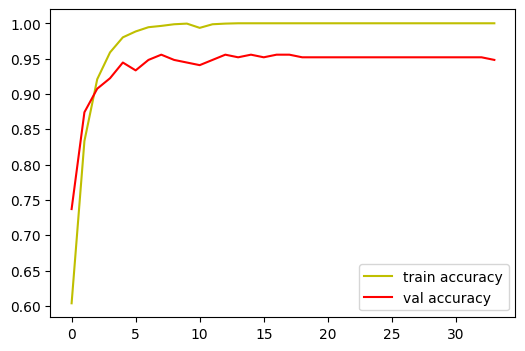

In [17]:
# accuracy curve
plt.figure(figsize=(6, 4))
plt.plot(lstm_h.history['accuracy'], 'y', label='train accuracy')
plt.plot(lstm_h.history['val_accuracy'], 'r', label='val accuracy')
plt.legend()
plt.show()

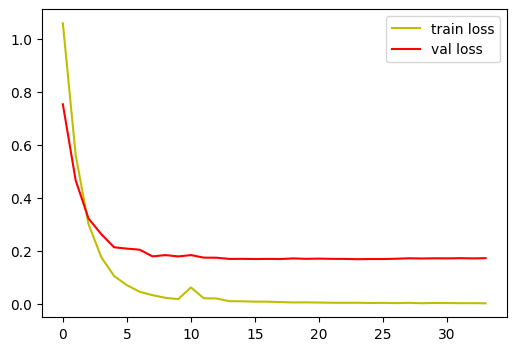

In [18]:
#loss curve
plt.figure(figsize=(6,4))
plt.plot(lstm_h.history['loss'][:], 'y', label='train loss')
plt.plot(lstm_h.history['val_loss'][:], 'r', label='val loss')
plt.legend()
plt.show()

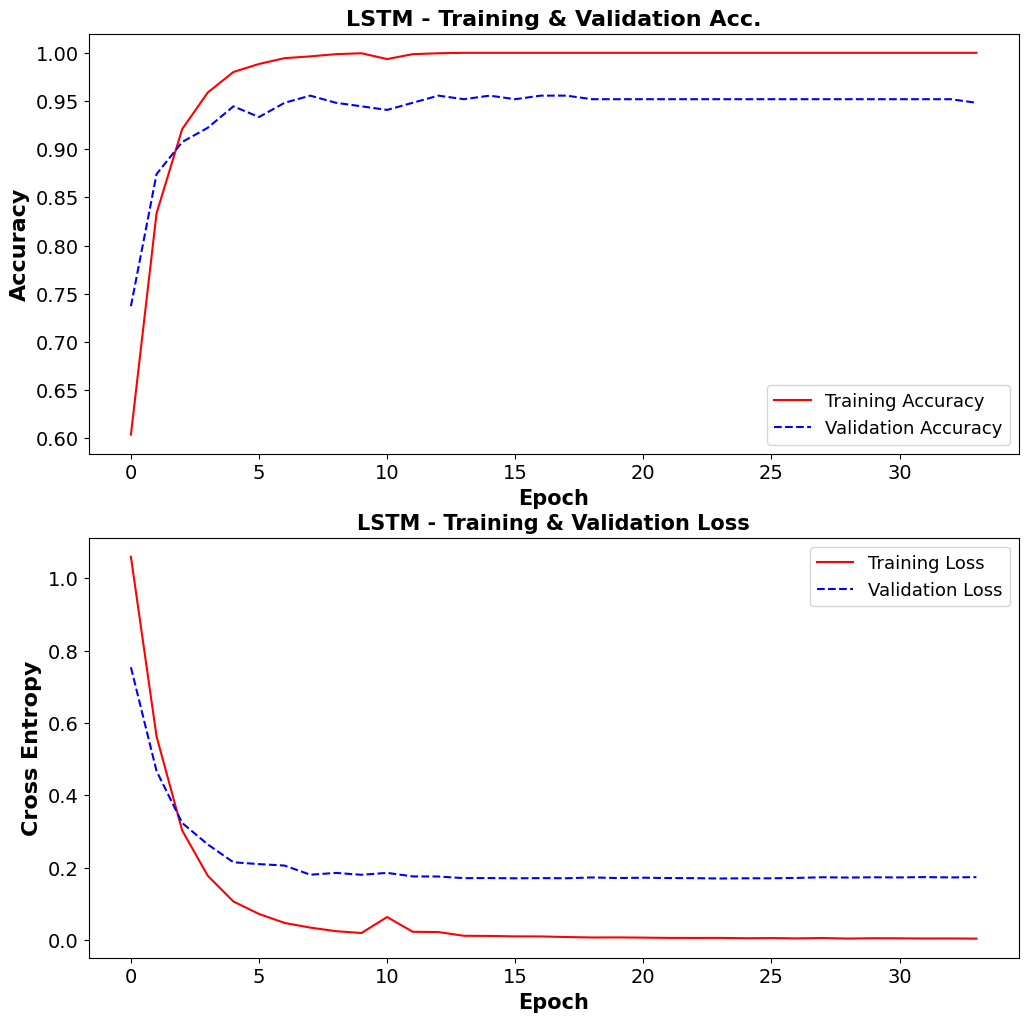

In [19]:
acc = lstm_h.history['accuracy']
val_acc = lstm_h.history['val_accuracy']
loss = lstm_h.history['loss']
val_loss = lstm_h.history['val_loss']
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b', linestyle='--') # Modify linestyle for validation accuracy
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Acc.', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b', linestyle='--') # Modify linestyle for validation loss
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()


----------------------------------------
